# 1. Parallelizing Neural Network Training with TensorFlow
## 1. First steps with TensorFlow

In [1]:
import tensorflow as tf
print('TensorFlow version:', tf.__version__)
import numpy as np

np.set_printoptions(precision=3)

TensorFlow version: 2.0.0


## 2. Creating tensors in TensorFlow

In [2]:
a = np.array([1, 2, 3], dtype=np.int32)
b = [4, 5, 6]

t_a = tf.convert_to_tensor(a)
t_b = tf.convert_to_tensor(b)

print(t_a)
print(t_b)

tf.Tensor([1 2 3], shape=(3,), dtype=int32)
tf.Tensor([4 5 6], shape=(3,), dtype=int32)


### 1. Checking if an variable is a tensor

In [3]:
tf.is_tensor(a), tf.is_tensor(t_a)

(False, True)

### 2. Chekcing the shape of a tensor

In [4]:
t_ones = tf.ones((2, 3))

t_ones.shape

TensorShape([2, 3])

### 3. Accessing the values a tensor refers to

In [5]:
t_ones.numpy()

array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

### 4. Creating a tensor of constant values

In [6]:
const_tensor = tf.constant([1.2, 5, np.pi], dtype=tf.float32)

print(const_tensor)

tf.Tensor([1.2   5.    3.142], shape=(3,), dtype=float32)


## 3. Manipulating the data type and shape of a tensor
### 1. Changing the datatype of a tensor

In [7]:
t_a_new = tf.cast(t_a, tf.int64)

print(t_a_new.dtype)

<dtype: 'int64'>


### 2. Transposing a tensor

In [8]:
t = tf.random.uniform(shape=(3, 5))

t_tr = tf.transpose(t)
print(t.shape, ' --> ', t_tr.shape)

(3, 5)  -->  (5, 3)


### 3. Reshaping a tensor (for example, from a 1D vector to a 2D array)

In [9]:
t = tf.zeros((30,))

t_reshape = tf.reshape(t, shape=(5, 6))

print(t_reshape.shape)

(5, 6)


### 4. Removing the unnecessary dimensions (dimensions that have size 1, which are not needed)

In [10]:
t = tf.zeros((1, 2, 1, 4, 1))

t_sqz = tf.squeeze(t, axis=(2, 4))

print(t.shape, ' --> ', t_sqz.shape)

(1, 2, 1, 4, 1)  -->  (1, 2, 4)


## 4. Applying mathematical operations to tensors
### 1. Instantiating random tensors with uniform or a standard normal distribution

In [11]:
tf.random.set_seed(1)

t1 = tf.random.uniform(shape=(5, 2), 
                       minval=-1.0,
                       maxval=1.0)

t2 = tf.random.normal(shape=(5, 2), 
                      mean=0.0,
                      stddev=1.0)

### 2. Computing the element-wise product of t1 and t2

In [12]:
t3 = tf.multiply(t1, t2).numpy()
print(t3)

[[-0.27  -0.874]
 [-0.017 -0.175]
 [-0.296 -0.139]
 [-0.727  0.135]
 [-0.401  0.004]]


### 3. Computing the mean, sum, or standard deviation along a certain axis (or axes) using tf.math.reduce_*

In [13]:
t4 = tf.math.reduce_mean(t1, axis=0)

print(t4)

tf.Tensor([0.09  0.207], shape=(2,), dtype=float32)


### 4. Computing the matrix-matrix product between t1 and t2

In [14]:
t5 = tf.linalg.matmul(t1, t2, transpose_b=True)

print(t5.numpy())

[[-1.144  1.115 -0.87  -0.321  0.856]
 [ 0.248 -0.191  0.25  -0.064 -0.331]
 [-0.478  0.407 -0.436  0.022  0.527]
 [ 0.525 -0.234  0.741 -0.593 -1.194]
 [-0.099  0.26   0.125 -0.462 -0.396]]


In [15]:
t6 = tf.linalg.matmul(t1, t2, transpose_a=True)

print(t6.numpy())

[[-1.711  0.302]
 [ 0.371 -1.049]]


### 5. Computing the Lp norm of a tensor (in this case L2 norm)

In [16]:
norm_t1 = tf.norm(t1, ord=2, axis=1).numpy()

print(norm_t1)

[1.046 0.293 0.504 0.96  0.383]


## 5. Split, stack, and concatenate tensors
### 1. Splitting by providing the number of splits (must be divisible)
- We divide the tensor of size 6 into a list of 4 tensors (the resulting size is 2 as expected)

In [17]:
tf.random.set_seed(1)

t = tf.random.uniform((6,))

print(t.numpy())

t_splits = tf.split(t, 3)

[item.numpy() for item in t_splits]

[0.165 0.901 0.631 0.435 0.292 0.643]


[array([0.165, 0.901], dtype=float32),
 array([0.631, 0.435], dtype=float32),
 array([0.292, 0.643], dtype=float32)]

### 2. Splitting by specifying the sizes of different splits
- Here we split a tensor of size 5 into tensors of sizes 3 and 2

In [18]:
tf.random.set_seed(1)
t = tf.random.uniform((5,))

print(t.numpy())

t_splits = tf.split(t, num_or_size_splits=[3, 2])

[item.numpy() for item in t_splits]

[0.165 0.901 0.631 0.435 0.292]


[array([0.165, 0.901, 0.631], dtype=float32),
 array([0.435, 0.292], dtype=float32)]

### 3. Concatenating multiple tensors

In [19]:
A = tf.ones((3,))
B = tf.zeros((2,))

C = tf.concat([A, B], axis=0)
print(C.numpy())

[1. 1. 1. 0. 0.]


### 4. Stacking multiple tensors

In [20]:
A = tf.ones((3,))
B = tf.zeros((3,))

S = tf.stack([A, B], axis=1)
print(S.numpy())

[[1. 0.]
 [1. 0.]
 [1. 0.]]


# 3. Building input pipelines using tf.data: The TensorFlow Dataset API
## 1. Creating a TensorFlow Dataset from existing tensors 

In [21]:
a = [1.2, 3.4, 7.5, 4.1, 5.0, 1.0]

ds = tf.data.Dataset.from_tensor_slices(a)

print(ds)

<TensorSliceDataset shapes: (), types: tf.float32>


## 2. Iterating through a TensorFlow dataset entry by entry

In [22]:
for item in ds:
    print(item)

tf.Tensor(1.2, shape=(), dtype=float32)
tf.Tensor(3.4, shape=(), dtype=float32)
tf.Tensor(7.5, shape=(), dtype=float32)
tf.Tensor(4.1, shape=(), dtype=float32)
tf.Tensor(5.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)


## 3. Creating and iterating through batches 

In [23]:
ds_batch = ds.batch(3)

for i, elem in enumerate(ds_batch, 1):
    print('batch {}:'.format(i), elem.numpy())

batch 1: [1.2 3.4 7.5]
batch 2: [4.1 5.  1. ]


## 4. Combining two tensors into a joint dataset
### 1. Create 2 tensors representing the feature values and the class values

In [24]:
tf.random.set_seed(1)

t_x = tf.random.uniform([4, 3], dtype=tf.float32)
t_y = tf.range(4)

### 2.1. Create a joint dataset from 2 datasets (one-to-one correspondance is required)

In [25]:
ds_x = tf.data.Dataset.from_tensor_slices(t_x)
ds_y = tf.data.Dataset.from_tensor_slices(t_y)
    
ds_joint = tf.data.Dataset.zip((ds_x, ds_y))

for example in ds_joint:
    print('  x: ', example[0].numpy(), 
          '  y: ', example[1].numpy())

x:  [0.165 0.901 0.631]   y:  0
  x:  [0.435 0.292 0.643]   y:  1
  x:  [0.976 0.435 0.66 ]   y:  2
  x:  [0.605 0.637 0.614]   y:  3


### 2.2. Alternatively, create a joint datasets from tensors directly

In [26]:
## method 2:
ds_joint = tf.data.Dataset.from_tensor_slices((t_x, t_y))

for example in ds_joint:
    print('  x: ', example[0].numpy(), 
          '  y: ', example[1].numpy())

x:  [0.165 0.901 0.631]   y:  0
  x: [0.435 0.292 0.643]   y:  1
  x:  [0.976 0.435 0.66 ]   y:  2
  x:  [0.605 0.637 0.614]   y:  3


## 5. Applying transformations to each individual element of a dataset
- In this case we scale the feature values from [0,1) to [-1,1)

In [27]:
ds_trans = ds_joint.map(lambda x, y: (x*2-1.0, y))

for example in ds_trans:
    print('  x: ', example[0].numpy(), 
          '  y: ', example[1].numpy())

x:  [-0.67   0.803  0.262]   y:  0
  x:  [-0.131 -0.416  0.285]   y:  1
  x:  [ 0.952 -0.13   0.32 ]   y:  2
  x:  [0.21  0.273 0.229]   y:  3


## 6. Shuffle, batch, and repeat
### 1. Shuffle the dataset without using the one-to-one correspondance between the entries in x and y
- We want to choose a relatively large buffer size, in this case we simply use the total number of training samples

In [28]:
tf.random.set_seed(1)
ds = ds_joint.shuffle(buffer_size=len(t_x))

for example in ds:
    print('  x: ', example[0].numpy(), 
          '  y: ', example[1].numpy())

x:  [0.976 0.435 0.66 ]   y:  2
  x:  [0.435 0.292 0.643]   y:  1
  x:  [0.165 0.901 0.631]   y:  0
  x:  [0.605 0.637 0.614]   y:  3


### 2. Create batches from the ds_joint dataset

In [29]:
ds = ds_joint.batch(batch_size=3,
                    drop_remainder=False)

batch_x, batch_y = next(iter(ds))

print('Batch-x: \n', batch_x.numpy())
print('Batch-y:   ', batch_y.numpy())

Batch-x: 
 [[0.165 0.901 0.631]
 [0.435 0.292 0.643]
 [0.976 0.435 0.66 ]]
Batch-y:    [0 1 2]


### 3. Repeat the batched dataset twice for training for multiple epochs

In [30]:
ds = ds_joint.batch(3).repeat(count=2)

for i,(batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (3, 3) [0 1 2]
1 (1, 3) [3]
2 (3, 3) [0 1 2]
3 (1, 3) [3]


- Chaning the order of repeat and batch leads to different results

In [31]:
ds = ds_joint.repeat(count=2).batch(3)

for i,(batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (3, 3) [0 1 2]
1 (3, 3) [3 0 1]
2 (2, 3) [2 3]


### 4.1. Try Order 1: shuffle -> batch -> repeat

In [32]:
tf.random.set_seed(1)

## Order 1: shuffle -> batch -> repeat
ds = ds_joint.shuffle(4).batch(2).repeat(3)

for i,(batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (2, 3) [2 1]
1 (2, 3) [0 3]
2 (2, 3) [0 3]
3 (2, 3) [1 2]
4 (2, 3) [3 0]
5 (2, 3) [1 2]


### 4.1. Try Order 2: batch -> shuffle -> repeat

In [33]:
tf.random.set_seed(1)

## Order 2: batch -> shuffle -> repeat
ds = ds_joint.batch(2).shuffle(4).repeat(3)

for i,(batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (2, 3) [0 1]
1 (2, 3) [2 3]
2 (2, 3) [0 1]
3 (2, 3) [2 3]
4 (2, 3) [2 3]
5 (2, 3) [0 1]


- While the first order code example appears to shuffle the dataset as expected, we can see that in the seccond case the elements within a batch were not shuffled at all

## 7. Creating a dataset from files on your local storage disk
### 1. Generate a list of image files

In [34]:
import pathlib

imgdir_path = pathlib.Path('cat_dog_images')

file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])

print(file_list)

['cat_dog_images\\cat-01.jpg', 'cat_dog_images\\cat-02.jpg', 'cat_dog_images\\cat-03.jpg', 'cat_dog_images\\dog-01.jpg', 'cat_dog_images\\dog-02.jpg', 'cat_dog_images\\dog-03.jpg']


### 2. Visualize the images

Image shape:  (900, 1200, 3)
Image shape:  (900, 1200, 3)
Image shape:  (900, 742, 3)
Image shape:  (800, 1200, 3)
Image shape:  (800, 1200, 3)
Image shape:  (900, 1200, 3)


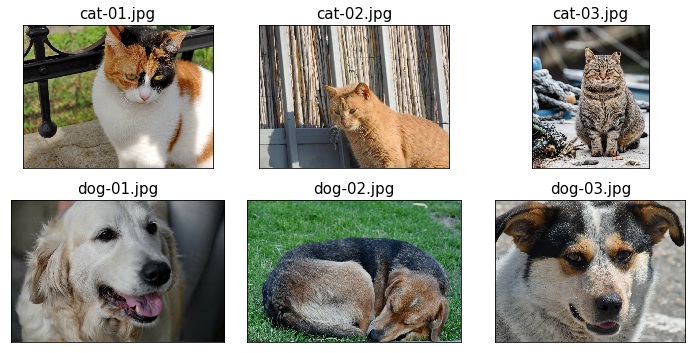

In [35]:
import matplotlib.pyplot as plt
import os


fig = plt.figure(figsize=(10, 5))
for i,file in enumerate(file_list):
    img_raw = tf.io.read_file(file)
    img = tf.image.decode_image(img_raw)
    print('Image shape: ', img.shape)
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)
    
plt.tight_layout()
plt.show()

### 3. Get the class labels from the list of filenames

In [36]:
labels = [1 if 'dog' in os.path.basename(file) else 0
          for file in file_list]
print(labels)

[0, 0, 0, 1, 1, 1]


### 4. Create a joint dataset from two tensors (a list of filenames and a list of their labels)

In [37]:
ds_files_labels = tf.data.Dataset.from_tensor_slices(
    (file_list, labels))

for item in ds_files_labels:
    print(item[0].numpy(), item[1].numpy())

b'cat_dog_images\\cat-01.jpg' 0
b'cat_dog_images\\cat-02.jpg' 0
b'cat_dog_images\\cat-03.jpg' 0
b'cat_dog_images\\dog-01.jpg' 1
b'cat_dog_images\\dog-02.jpg' 1
b'cat_dog_images\\dog-03.jpg' 1


### 5. Write a helper function to use instead of a lambda function when calling the .map() method and use it to preprocess the dataset
- We need to apply multiple preprocessing steps this time, so a simple lambda function is not sufficient

(80, 120, 3) 0
(80, 120, 3) 0
(80, 120, 3) 0
(80, 120, 3) 1
(80, 120, 3) 1
(80, 120, 3) 1


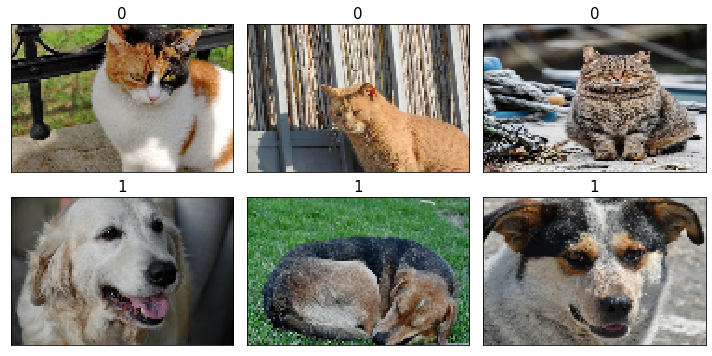

In [38]:
def load_and_preprocess(path, label):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [img_height, img_width])
    image /= 255.0

    return image, label

img_width, img_height = 120, 80

ds_images_labels = ds_files_labels.map(load_and_preprocess)

fig = plt.figure(figsize=(10, 5))
for i,example in enumerate(ds_images_labels):
    print(example[0].shape, example[1].numpy())
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(example[0])
    ax.set_title('{}'.format(example[1].numpy()), 
                 size=15)
    
plt.tight_layout()
plt.show()

## 8. Fetching available datasets from the tensorflow_datasets library
### 1. Check the available datasets

In [39]:
import tensorflow_datasets as tfds

print(len(tfds.list_builders()))
print(tfds.list_builders()[:5])

195
['abstract_reasoning', 'aeslc', 'aflw2k3d', 'ai2_arc', 'amazon_us_reviews']


## 9. Fetching CelebA dataset
### 1. Call the dataset builder function and check the associated description
- We can gather that the features are stored as a dictionary with three keys: 'image', 'landmarks', 'attributes'
- The 'image' entry refers to the face of a celebrity; 'landmarks' refers to the dictionary of extracted facial points, such as the position of the eyes, nose, and so on; and 'attributes' is a dictionary of 40 facial attributes for the person in the image, like facial expression, makeup, hair properties, and so on

In [40]:
celeba_bldr = tfds.builder('celeb_a')

print(celeba_bldr.info.features)
print('\n', 30*"=", '\n')
print(celeba_bldr.info.features.keys())
print('\n', 30*"=", '\n')
print(celeba_bldr.info.features['image'])
print('\n', 30*"=", '\n')
print(celeba_bldr.info.features['attributes'].keys())
print('\n', 30*"=", '\n')
print(celeba_bldr.info.citation)

FeaturesDict({
    'attributes': FeaturesDict({
        '5_o_Clock_Shadow': tf.bool,
        'Arched_Eyebrows': tf.bool,
        'Attractive': tf.bool,
        'Bags_Under_Eyes': tf.bool,
        'Bald': tf.bool,
        'Bangs': tf.bool,
        'Big_Lips': tf.bool,
        'Big_Nose': tf.bool,
        'Black_Hair': tf.bool,
        'Blond_Hair': tf.bool,
        'Blurry': tf.bool,
        'Brown_Hair': tf.bool,
        'Bushy_Eyebrows': tf.bool,
        'Chubby': tf.bool,
        'Double_Chin': tf.bool,
        'Eyeglasses': tf.bool,
        'Goatee': tf.bool,
        'Gray_Hair': tf.bool,
        'Heavy_Makeup': tf.bool,
        'High_Cheekbones': tf.bool,
        'Male': tf.bool,
        'Mouth_Slightly_Open': tf.bool,
        'Mustache': tf.bool,
        'Narrow_Eyes': tf.bool,
        'No_Beard': tf.bool,
        'Oval_Face': tf.bool,
        'Pale_Skin': tf.bool,
        'Pointy_Nose': tf.bool,
        'Receding_Hairline': tf.bool,
        'Rosy_Cheeks': tf.bool,
        'Sidebu

### 2. Download the data, prepare it, and write it to disk

In [50]:
celeba_bldr.download_and_prepare()

### 3. Load the dataset from disk as tf.data.Datasets

In [51]:
datasets = celeba_bldr.as_dataset(shuffle_files=False)

datasets.keys()

dict_keys(['test', 'train', 'validation'])

### 4. Check what the data for one training image looks like
- We can see that all elements of this dataset come in a dictionary

In [52]:
ds_train = datasets['train']
assert isinstance(ds_train, tf.data.Dataset)

example = next(iter(ds_train))
print(type(example))
print(example.keys())

<class 'dict'>
dict_keys(['attributes', 'image', 'landmarks'])


### 5. Apply the necessary transformation to this dataset to pass it to a model via map()
- If we want to pass this dataset to a supervised deep learning model during training, we have to reformat it as a tuple of (features, label)
- For the label, we will use the 'Male' category from the attributes

In [53]:
ds_train = ds_train.map(lambda item: 
     (item['image'], tf.cast(item['attributes']['Male'], tf.int32)))

### 6. Batch the dataset and take a batch of 18 examples from it

In [54]:
ds_train = ds_train.batch(18)
images, labels = next(iter(ds_train))

print(images.shape, labels)

(18, 218, 178, 3) tf.Tensor([0 1 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1], shape=(18,), dtype=int32)


### 7. Visualize the taken batch with the corresponding labels

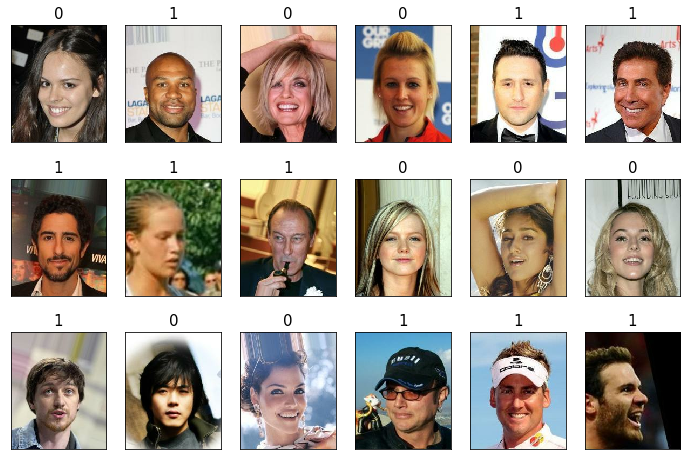

In [55]:
fig = plt.figure(figsize=(12, 8))
for i,(image,label) in enumerate(zip(images, labels)):
    ax = fig.add_subplot(3, 6, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image)
    ax.set_title('{}'.format(label), size=15)
    
plt.show()

## 10. Alternative ways for loading a dataset
### 1. Use the load() wrapper function to fetch the MNIST digit dataset

In [56]:
mnist, mnist_info = tfds.load('mnist', with_info=True,
                              shuffle_files=False)

print(mnist_info)

print(mnist.keys())

]
42161 examples [01:08, 676.61 examples/s]
42240 examples [01:08, 706.91 examples/s]
42319 examples [01:08, 728.15 examples/s]
42404 examples [01:08, 752.88 examples/s]
42480 examples [01:08, 745.14 examples/s]
42560 examples [01:08, 757.35 examples/s]
42637 examples [01:08, 750.38 examples/s]
42713 examples [01:08, 721.55 examples/s]
42788 examples [01:08, 729.59 examples/s]
42862 examples [01:09, 681.80 examples/s]
42937 examples [01:09, 693.46 examples/s]
43016 examples [01:09, 717.96 examples/s]
43089 examples [01:09, 689.69 examples/s]
43159 examples [01:09, 689.29 examples/s]
43229 examples [01:09, 692.16 examples/s]
43299 examples [01:09, 659.33 examples/s]
43366 examples [01:09, 646.56 examples/s]
43437 examples [01:09, 662.29 examples/s]
43528 examples [01:09, 720.47 examples/s]
43607 examples [01:10, 738.98 examples/s]
43686 examples [01:10, 752.51 examples/s]
43771 examples [01:10, 778.26 examples/s]
43850 examples [01:10, 764.88 examples/s]
43928 examples [01:10, 697.46 ex

### 2. Apply a transformation to convert the elements from a dictionary to a tuple, and visualize 10 examples

(10, 28, 28, 1) tf.Tensor([4 1 0 7 8 1 2 7 1 6], shape=(10,), dtype=int64)


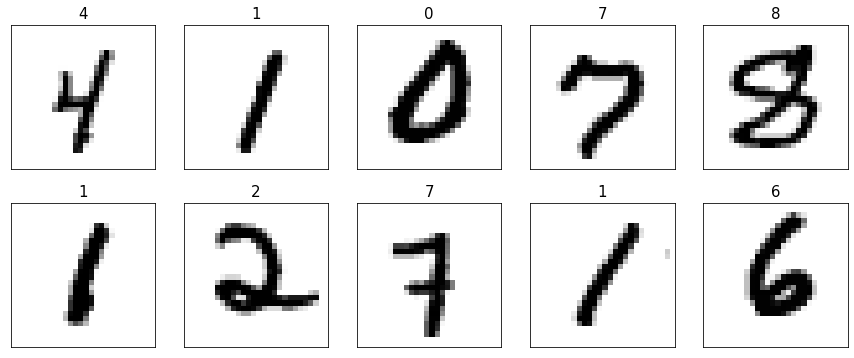

In [57]:
ds_train = mnist['train']

assert isinstance(ds_train, tf.data.Dataset)

ds_train = ds_train.map(lambda item: 
     (item['image'], item['label']))

ds_train = ds_train.batch(10)
batch = next(iter(ds_train))
print(batch[0].shape, batch[1])

fig = plt.figure(figsize=(15, 6))
for i,(image,label) in enumerate(zip(batch[0], batch[1])):
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image[:, :, 0], cmap='gray_r')
    ax.set_title('{}'.format(label), size=15)
    
plt.show()